In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mftool import Mftool
from datetime import datetime
today_date = datetime.now().strftime('%d-%m-%Y')
todaydate = datetime.now().strftime('%d/%m/%Y')
import warnings
warnings.filterwarnings("ignore")
import seaborn as sbn
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
mf = Mftool()
import investpy as ipy
import mplfinance as mpl
# import tessa as ts
# from tessa import Symbol, SymbolCollection, search
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
print(todaydate)

04/02/2024


In [4]:
bond = ipy.get_bond_countries()
bond

['argentina',
 'australia',
 'austria',
 'bahrain',
 'bangladesh',
 'belgium',
 'botswana',
 'brazil',
 'bulgaria',
 'canada',
 'chile',
 'china',
 'colombia',
 'croatia',
 'cyprus',
 'czech republic',
 'denmark',
 'egypt',
 'finland',
 'france',
 'germany',
 'greece',
 'hong kong',
 'hungary',
 'iceland',
 'india',
 'indonesia',
 'ireland',
 'israel',
 'italy',
 'japan',
 'jordan',
 'kenya',
 'latvia',
 'lithuania',
 'luxembourg',
 'malaysia',
 'malta',
 'mauritius',
 'mexico',
 'morocco',
 'namibia',
 'netherlands',
 'new zealand',
 'nigeria',
 'norway',
 'pakistan',
 'peru',
 'philippines',
 'poland',
 'portugal',
 'qatar',
 'romania',
 'russia',
 'saudi arabia',
 'serbia',
 'singapore',
 'slovakia',
 'slovenia',
 'south africa',
 'south korea',
 'spain',
 'sri lanka',
 'sweden',
 'switzerland',
 'taiwan',
 'thailand',
 'turkey',
 'uganda',
 'ukraine',
 'united kingdom',
 'united states',
 'venezuela',
 'vietnam']

API key : U6HUGRZUBMEIROX3

In [5]:

scheme_codes = mf.get_scheme_codes()
print(type(scheme_codes))
print(len(scheme_codes))
scheme_codes
# sc_codes=pd.DataFrame([scheme_codes])
# sc_codes.lookup

# av_sc = mf.get_available_schemes()
# print(av_sc)
# amc=mf.get_all_amc_profiles(True)
# print(type(amc))
# amc



<class 'dict'>
12836


{'119551': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - IDCW',
 '119552': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - MONTHLY IDCW',
 '119553': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - Direct - Quarterly IDCW',
 '108272': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - REGULAR - IDCW',
 '110282': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - REGULAR - MONTHLY IDCW',
 '108274': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - REGULAR - Quarterly IDCW',
 '110490': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - retail - monthly IDCW',
 '106157': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - retail - quarterly IDCW',
 '108273': 'Aditya Birla Sun Life Banking & PSU Debt Fund - Regular Plan-Growth',
 '103176': 'Aditya Birla Sun Life Banking & PSU Debt Fund - Retail Plan-Growth',
 '119550': 'Aditya Birla Sun Life Banking & PSU Debt Fund- Direct Plan-Growth',
 '128952': 'Axis Banking & PSU Debt Fund - Direct Plan - Bonus Option',
 '120437': '

In [7]:
sc_names = [x for x in scheme_codes.values()]
print(type(sc_names))
adityabirla=[]
axis = []
bajajfinserv=[]
bandhan=[]
bbp=[]
canararobeco=[]
dsp=[]
edelweiss=[]
franklin=[]
hdfc = []
hsbc = []
icici = []
invesco = []
iti = []
kotak=[]
tata=[]
lic=[]
nippon = []
mirae = []
sbi = []
sundaram = []
trustmf = []
quantum = []
uti = []
union = []
pgim = []
boi = []
groww=[]
jm = []
one = []
for i in range(12778):
    sc_names[i] = str(sc_names[i])
    if 'Aditya Birla' in sc_names[i]:
        adityabirla.append(sc_names[i])
    elif 'Axis' in sc_names[i]:
        axis.append(sc_names[i])
    elif 'Bandhan' in sc_names[i]:
        bandhan.append(sc_names[i])
    elif 'Bajaj Finserv' in sc_names[i]:
        bajajfinserv.append(sc_names[i])
    elif 'Baroda BNP Paribas' in sc_names[i]:
        bbp.append(sc_names[i])
    elif 'Canara Robeco' in sc_names[i]:
        canararobeco.append(sc_names[i])
    elif 'DSP' in sc_names[i]:
        dsp.append(sc_names[i])
    elif 'Edelweiss' in sc_names[i]:
        edelweiss.append(sc_names[i])
    elif 'Franklin' in sc_names[i]:
        franklin.append(sc_names[i])
    elif 'HDFC' in sc_names[i]:
        hdfc.append(sc_names[i])
    elif 'HSBC' in sc_names[i]:
        hsbc.append(sc_names[i])
    elif 'ICICI Prudential' in sc_names[i]:
        icici.append(sc_names[i])
    elif 'Invesco India' in sc_names[i]:
        invesco.append(sc_names[i])
    elif 'ITI' in sc_names[i]:
        iti.append(sc_names[i])
    elif 'Kotak' in sc_names[i]:
        kotak.append(sc_names[i])
    elif 'LIC MF ' in sc_names[i]:
        lic.append(sc_names[i])
    elif 'Mirae Asset ' in sc_names[i]:
        mirae.append(sc_names[i])
    elif ('NIPPON' in sc_names[i]) or ('Nippon' in sc_names[i]):
        nippon.append(sc_names[i])
    elif 'SBI ' in sc_names[i]:
        sbi.append(sc_names[i])
    elif 'Sundaram ' in sc_names[i]:
        sundaram.append(sc_names[i])
    elif 'Tata ' in sc_names[i]:
        tata.append(sc_names[i])
    elif 'TRUSTMF' in sc_names[i]:
        trustmf.append(sc_names[i])
    elif 'UTI ' in sc_names[i]:
        uti.append(sc_names[i])
    elif 'Union ' in sc_names[i]:
        union.append(sc_names[i])
    elif 'PGIM ' in sc_names[i]:
        pgim.append(sc_names[i])
    elif 'BANK OF INDIA ' in sc_names[i]:
        boi.append(sc_names[i])
    elif '360 ONE ' in sc_names[i]:
        one.append(sc_names[i])
    elif 'Groww ' in sc_names[i]:
        groww.append(sc_names[i])
    elif 'JM ' in sc_names[i]:
        jm.append(sc_names[i])
    elif 'Quantum ' in sc_names[i]:
        quantum.append(sc_names[i])
    
sc_names
# adityabirla


<class 'list'>


['Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - IDCW',
 'Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - MONTHLY IDCW',
 'Aditya Birla Sun Life Banking & PSU Debt Fund  - Direct - Quarterly IDCW',
 'Aditya Birla Sun Life Banking & PSU Debt Fund  - REGULAR - IDCW',
 'Aditya Birla Sun Life Banking & PSU Debt Fund  - REGULAR - MONTHLY IDCW',
 'Aditya Birla Sun Life Banking & PSU Debt Fund  - REGULAR - Quarterly IDCW',
 'Aditya Birla Sun Life Banking & PSU Debt Fund  - retail - monthly IDCW',
 'Aditya Birla Sun Life Banking & PSU Debt Fund  - retail - quarterly IDCW',
 'Aditya Birla Sun Life Banking & PSU Debt Fund - Regular Plan-Growth',
 'Aditya Birla Sun Life Banking & PSU Debt Fund - Retail Plan-Growth',
 'Aditya Birla Sun Life Banking & PSU Debt Fund- Direct Plan-Growth',
 'Axis Banking & PSU Debt Fund - Direct Plan - Bonus Option',
 'Axis Banking & PSU Debt Fund - Direct Plan - Daily IDCW',
 'Axis Banking & PSU Debt Fund - Direct Plan - Growth Option',
 'Axis Ba

In [5]:
adityabirla=[]
for i in range(12778):
    scheme_codes.values[i] = str(scheme_codes.values[i])
    if 'Aditya Birla' in scheme_codes.values[i]:
        adityabirla.append(scheme_codes.values[i])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [6]:
axis_group = {}
for string in axis:
    words = string.split()
    if len(words) > 2:
        w = words[1] + ' ' + words[2]
        if w in axis_group:
            axis_group[w].append(string)
        else:
            axis_group[w] = [string]
axis_group

{'Banking &': ['Axis Banking & PSU Debt Fund - Direct Plan - Bonus Option',
  'Axis Banking & PSU Debt Fund - Direct Plan - Daily IDCW',
  'Axis Banking & PSU Debt Fund - Direct Plan - Growth Option',
  'Axis Banking & PSU Debt Fund - Direct Plan - Monthly IDCW',
  'Axis Banking & PSU Debt Fund - Direct Plan - Weekly IDCW',
  'Axis Banking & PSU Debt Fund - Regular Plan - Bonus Option',
  'Axis Banking & PSU Debt Fund - Regular Plan - Daily IDCW',
  'Axis Banking & PSU Debt Fund - Regular Plan - Growth option',
  'Axis Banking & PSU Debt Fund - Regular Plan - Monthly IDCW',
  'Axis Banking & PSU Debt Fund - Regular Plan - Weekly IDCW'],
 'Corporate Debt': ['Axis Corporate Debt Fund - Direct Plan - Daily IDCW',
  'Axis Corporate Debt Fund - Direct Plan - Monthly IDCW',
  'Axis Corporate Debt Fund - Direct Plan - Regular IDCW',
  'Axis Corporate Debt Fund - Direct Plan - Weekly IDCW',
  'Axis Corporate Debt Fund - Direct Plan Growth',
  'Axis Corporate Debt Fund - Regular Plan - Daily ID

In [74]:
adityabirla_group = {}
for string in adityabirla:
    words = string.split()
    if len(words) > 2:
        w = words[3] + ' ' + words[4]
        if w in adityabirla_group:
            adityabirla_group[w].append(string)
        else:
            adityabirla_group[w] = [string]
adityabirla_group

{}

In [28]:
k = list(word_group.keys())
k
list1 = word_group['Liquid Fund']
m = len(word_group['Liquid Fund'])
s = str(list1[1])

for i in range(m):
    for key, values in scheme_codes.items():
        if values == s:
            t = key
print(t)

151838


In [ ]:
bajajfinserv_group = {}
for string in bajajfinserv:
    words = string.split()
    if len(words) > 2:
        w = words[2] + ' ' + words[3]
        if w in bajajfinserv_group:
            bajajfinserv_group[w].append(string)
        else:
            bajajfinserv_group[w] = [string]
bajajfinserv_group


In [ ]:
bandhan_group = {}
for string in bandhan:
    words = string.split()
    if len(words) > 2:
        w = words[1] + ' ' + words[2]
        if w in bandhan_group:
            bandhan_group[w].append(string)
        else:
            bandhan_group[w] = [string]
bandhan_group

In [ ]:
canararobeco_group = {}
for string in canararobeco:
    words = string.split()
    if len(words) > 2:
        w = words[2] + ' ' + words[3]
        if w in canararobeco_group:
            canararobeco_group[w].append(string)
        else:
            canararobeco_group[w] = [string]
canararobeco_group

In [ ]:
dsp_group = {}
for string in dsp:
    words = string.split()
    if len(words) > 2:
        w = words[1] + ' ' + words[2]
        if w in dsp_group:
            dsp_group[w].append(string)
        else:
            dsp_group[w] = [string]
dsp_group

In [ ]:
edelweiss_group = {}
for string in edelweiss:
    words = string.split()
    if len(words) > 2:
        w = words[1] + ' ' + words[2]
        if w in edelweiss_group:
            edelweiss_group[w].append(string)
        else:
            edelweiss_group[w] = [string]
edelweiss_group

In [ ]:
franklin_group = {}
for string in franklin:
    words = string.split()
    if len(words) > 3:
        w = words[2] + ' ' + words[3]
        if w in franklin_group:
            franklin_group[w].append(string)
        else:
            franklin_group[w] = [string]
franklin_group

In [ ]:
groww_group = {}
for string in groww:
    words = string.split()
    if len(words) > 2:
        w = words[1] + ' ' + words[2]
        if w in groww_group:
            groww_group[w].append(string)
        else:
            groww_group[w] = [string]
groww_group

In [ ]:
hdfc_group = {}
for string in hdfc:
    words = string.split()
    if len(words) > 2:
        w = words[1] + ' ' + words[2] + ' ' + words[3]
        if w in hdfc_group:
            hdfc_group[w].append(string)
        else:
            hdfc_group[w] = [string]
hdfc_group

In [ ]:
hsbc_group = {}
for string in hsbc:
    words = string.split()
    if len(words) > 2:
        w = words[1] + ' ' + words[2]
        if w in hsbc_group:
            hsbc_group[w].append(string)
        else:
            hsbc_group[w] = [string]
hsbc_group

In [ ]:
icici_group = {}
for string in icici:
    words = string.split()
    if len(words) > 4:
        w = words[2] + ' ' + words[3] + ' ' + words[4]
        if w in icici_group:
            icici_group[w].append(string)
        else:
            icici_group[w] = [string]
icici_group

In [ ]:
invesco_group = {}
for string in invesco:
    words = string.split()
    if len(words) > 4:
        w = words[2] + ' ' + words[3] + ' ' + words[4]
        if w in invesco_group:
            invesco_group[w].append(string)
        else:
            invesco_group[w] = [string]
invesco_group

In [ ]:
jm_group = {}
for string in jm:
    words = string.split()
    if len(words) > 2:
        w = words[1] + ' ' + words[2]
        if w in jm_group:
            jm_group[w].append(string)
        else:
            jm_group[w] = [string]
jm_group

In [ ]:
kotak_group = {}
for string in kotak:
    words = string.split()
    if len(words) > 4:
        w = words[1] + ' ' + words[2] + ' ' + words[4]
        if w in kotak_group:
            kotak_group[w].append(string)
        else:
            kotak_group[w] = [string]
kotak_group

In [ ]:
nippon_group = {}
for string in nippon:
    words = string.split()
    if len(words) > 5:
        w = words[2] + ' ' + words[3]  + ' '  + words[4]
        if w in nippon_group:
            nippon_group[w].append(string)
        else:
            nippon_group[w] = [string]
nippon_group

In [ ]:
pgim_group = {}
for string in pgim:
    words = string.split()
    if len(words) > 4:
        w = words[2] + ' ' + words[3] + ' ' + words[4]
        if w in pgim_group:
            pgim_group[w].append(string)
        else:
            pgim_group[w] = [string]
pgim_group


In [ ]:
sbi_group = {}
for string in sbi:
    words = string.split()
    if len(words) > 4:
        w = words[1] + ' ' + words[2] + ' ' + words[3]
        if w in sbi_group:
            sbi_group[w].append(string)
        else:
            sbi_group[w] = [string]
sbi_group


In [ ]:
tata_group = {}
for string in tata:
    words = string.split()
    if len(words) > 4:
        w = words[1] + ' ' + words[2]
        if w in tata_group:
            tata_group[w].append(string)
        else:
            tata_group[w] = [string]
tata_group


In [9]:
uti_group = {}
for string in uti:
    words = string.split()
    if len(words) > 4:
        w = words[1] + ' ' + words[2] + ' ' + words[4]
        if w in uti_group:
            uti_group[w].append(string)
        else:
            uti_group[w] = [string]
uti_group
uti_group['Banking & Fund']

['UTI Banking & PSU Fund - Direct Plan - Annual IDCW',
 'UTI Banking & PSU Fund - Direct Plan - Flexi IDCW',
 'UTI Banking & PSU Fund - Direct Plan - Growth Option',
 'UTI Banking & PSU Fund - Direct Plan - Half-Yearly IDCW',
 'UTI Banking & PSU Fund - Direct Plan - Monthly IDCW',
 'UTI Banking & PSU Fund - Direct Plan - Quarterly IDCW',
 'UTI Banking & PSU Fund - Regular Plan - Annual IDCW',
 'UTI Banking & PSU Fund - Regular Plan - Flexi IDCW',
 'UTI Banking & PSU Fund - Regular Plan - Half-Yearly IDCW',
 'UTI Banking & PSU Fund - Regular Plan - Monthly IDCW',
 'UTI Banking & PSU Fund - Regular Plan - Quarterly IDCW']

In [ ]:
union_group = {}
for string in union:
    words = string.split()
    if len(words) > 4:
        w = words[1] + ' ' + words[2] + ' ' + words[4]
        if w in union_group:
            union_group[w].append(string)
        else:
            union_group[w] = [string]
union_group

In [38]:
quantum_group = {}
for string in quantum:
    words = string.split()
    if len(words) > 4:
        w = words[1] + ' ' + words[2] + ' ' + words[4]
        if w in quantum_group:
            quantum_group[w].append(string)
        else:
            quantum_group[w] = [string]
quantum_group

9

In [41]:
print("Select Fund House : ")
print()
print("1  Axis ")
print("2  Aditya Birla")
print("3  Bandhan ")
print("4  Bank")
print("5  Bandhan Bank")
print("6  Canara Robeco")
print("7  DSP")
print("8  Edelweiss")
print("9  Franklin")
print("10 Groww")
print("11 HDFC")
print("12 HSBC")
print("13 ICICI")
print("14 Invesco India")
print("15 JM Financial")
print("16 Kotak")
print("17 Nippon India")
print("18 PGIM")
print("19 Quantum")
print("20 SBI")
print("21 Tata")
print("22 UTI")
print("23 Union")
c = int(input("Enter Choice (1 to 23) : "))

if c == 1:
    mh = 'axis'
elif c==2:
    mh = ''

Select Fund House : 

1  Axis 
2  Aditya Birla
3  Bandhan 
4  Bank
5  Bandhan Bank
6  Canara Robeco
7  DSP
8  Edelweiss
9  Franklin
10 Groww
11 HDFC
12 HSBC
13 ICICI
14 Invesco India
15 JM Financial
16 Kotak
17 Nippon India
18 PGIM
19 Quantum
20 SBI
21 Tata
22 UTI
23 Union


In [81]:
sc_list = [x for x in scheme_codes.keys()]
sc_list
sc_names
sc_list

['119551',
 '119552',
 '119553',
 '108272',
 '110282',
 '108274',
 '110490',
 '106157',
 '108273',
 '103176',
 '119550',
 '128952',
 '120437',
 '120438',
 '120439',
 '120436',
 '128953',
 '117447',
 '117446',
 '117449',
 '117448',
 '152164',
 '152163',
 '152165',
 '152166',
 '152162',
 '152167',
 '121936',
 '127471',
 '121934',
 '121279',
 '121281',
 '121935',
 '121938',
 '121933',
 '127470',
 '121931',
 '121280',
 '121282',
 '121932',
 '121937',
 '148629',
 '148628',
 '148630',
 '148625',
 '148626',
 '148627',
 '150505',
 '150507',
 '150503',
 '150504',
 '124175',
 '124178',
 '124182',
 '124176',
 '124177',
 '124183',
 '124172',
 '124174',
 '124173',
 '124180',
 '124181',
 '124179',
 '140286',
 '140288',
 '140291',
 '140293',
 '140290',
 '140283',
 '140284',
 '140294',
 '140292',
 '140289',
 '129008',
 '129006',
 '129009',
 '129007',
 '128628',
 '128629',
 '128627',
 '128626',
 '151108',
 '151107',
 '151106',
 '151109',
 '151102',
 '151104',
 '151105',
 '151103',
 '112343',
 '112344',

Fund house :  Invesco Mutual Fund
Scheme type :  Open Ended Schemes
Scheme category :  Debt Scheme - Gilt Fund
Scheme name :  Invesco India Gilt Fund - Annual IDCW (Payout / Reinvestment)
Scheme start date :  {'date': '09-09-2008', 'nav': '10.00200'}


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

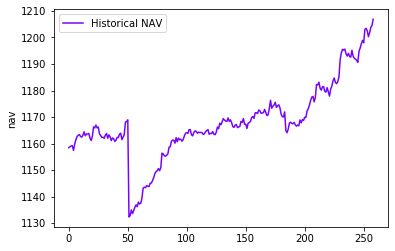

In [5]:
from scipy.stats import linregress
sc_code = str(input("Enter Scheme code : "))
nav_data = mf.get_scheme_historical_nav_for_dates(sc_code,'01-01-2023',today_date)
nav_data
nav_data['data']
# print(nav_data['data'].index())
df = pd.DataFrame(nav_data['data'])
print("Fund house : ", str(nav_data['fund_house']))
print("Scheme type : ", str(nav_data['scheme_type']))
print("Scheme category : ", str(nav_data['scheme_category']))
print("Scheme name : ", str(nav_data['scheme_name']))
print("Scheme start date : ", str(nav_data['scheme_start_date']))
df['date'] = pd.to_datetime(df['date'])
df_reverse = df.iloc[::-1]
sc_name = str(nav_data['scheme_name'])
sbn.lineplot(df_reverse.index, df['nav'], label='Historical NAV',color="#7703FC")

# Calculate linear regression
slope, intercept, r_value, p_value = linregress(df_reverse.index, df['nav'])
# Plot linear regression line
plt.plot(df_reverse.index, intercept + slope * df_reverse.index, color='red', label='Linear Regression')

plt.ylabel("NAV")
plt.legend()
plt.title(f"{sc_name}")
df['nav']

In [8]:
nav_data['data']
df_reverse
df
df_reverse['nav']
nav = pd.DataFrame({'NAV':df['nav']})
nav.index = df_reverse.index
nav['NAV']
# type(df['nav'])
# type(nav['NAV'])


TypeError: 'NoneType' object is not subscriptable

In [13]:
l = len(df)
stepwise_fit = auto_arima(nav, suppress_warnings=True)
stepwise_fit.summary()
n = len(nav['NAV'])
train_size = int(n * 0.80)
#train test split
train_set = df.iloc[:train_size]
test_set = df.iloc[train_size:]
print(len(train_set))
print(len(test_set))
train_set
model = ARIMA(nav['NAV'], order = (17,2,17))
model_fit = model.fit()





200
51


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [6]:
#Get daily performance of open ended equitynschemes
value = mf.get_open_ended_equity_scheme_performance('128953')
print(value)

value = mf.get_open_ended_debt_scheme_performance(True)
value

amc_details = mf.get_all_amc_profiles(True)
# print(type(amc_details))
# df = pd.DataFrame(amc_details)
print(amc_details)



{'Large Cap': [], 'Large & Mid Cap': [], 'Multi Cap': [], 'Mid Cap': [], 'Small Cap': [], 'Value': [], 'ELSS': [], 'Contra': [], 'Dividend Yield': [], 'Focused': []}
[{"Name of the Mutual Fund": "Aditya Birla Sun Life Mutual Fund", "Date of set up of Mutual Fund": "December 23, 1994", "Name(s) of Sponsor": "Aditya Birla Capital Limited                                      Sun Life (India) AMC Investments Inc.", "Name of Trustee Company": "Aditya Birla Sun Life Trustee Private Limited", "Name of Trustees": "Dr. Ajit Ranade - Associate Director                                      Mr. Anjani Kumar Agrawal - Director                                      Mr. Debasish Mallick - Director                                      Mr. Karim Gilani - Associate Director                                      Mr. Najib Shah - Director                                      Mr. Pravin Kutumbe - Director", "Name of Assest Management Co.": "Aditya Birla Sun Life AMC Limited", "Date of Incorporation of AMC": 